In [1]:
source(file.path("../../src/00.0_init.R"))

[1] "stats_annot.RData doesn't exist. Run script 01.2 to create. Only loading basic sample annotation."
[1] "species_list_ordered.txt doesn´t exist. Run 99.3 to create"


In [119]:
annot_full <- fread("../meta/WGBS_prediction_selection.tsv")

In [120]:
head(annot_full)

Species,genomeId,assembly,BSlibrary,Species_match,data_type,thr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
Mus_musculus,Mmusculus,mm9,BSgenome.Mmusculus.UCSC.mm9,MOU,CpG.calls.txt,10
Gallus_gallus,Ggallus,galGal5,BSgenome.Ggallus.UCSC.galGal5,CHK,cov_and_ratio,10
Phascolarctos_cinereus,Pcinereus,phaCinunswv41,BSgenome.Pcinereus.NCBI.phaCinunswv41,KOA,CpGreport,10
Bos_taurus,Btaurus,bosTau9,BSgenome.Btaurus.UCSC.bosTau9,ANW,CpGreport,10
Danio_rerio_GSE134055,Drerio,danRer11,BSgenome.Drerio.UCSC.danRer11,ZF,gemBS,10
Branchiostoma_lanceolatum,Blanceolatum,Bl71nemr,BSgenome.Blanceolatum.Amphiencode.Bl71nemr,FLA,Misc,5


In [3]:
path_to_results <- "../validation/WGBS_public/prediction/"

In [4]:
kebabs_dirs <- list.dirs(path = "../validation/WGBS_public/prediction/Gallus_gallus/galGal5/", recursive = F)

In [6]:
kebabs_dirs

[1] "../validation/WGBS_public/prediction/Gallus_gallus/galGal5//kebabs_model"    
[2] "../validation/WGBS_public/prediction/Gallus_gallus/galGal5//kebabs_model_376"
[3] "../validation/WGBS_public/prediction/Gallus_gallus/galGal5//kebabs_model_917"

In [172]:
full_full_df <- data.table()
for(i in seq(1:NROW(annot_full))){
    species <- annot_full$Species[[i]]
    assembly <- annot_full$assembly[[i]]
    full_df <- data.table()
    kebabs_dirs <- list.dirs(path = paste0(path_to_results, "/", species, "/", assembly), recursive = F)
    
    for(i in seq_along(kebabs_dirs)){
        print(kebabs_dirs[i])
    df <- fread(paste0(kebabs_dirs[i], "/", assembly, "roc_res.csv"))
        
    df$seed_id <- strsplit(strsplit(kebabs_dirs[i], "/")[[1]][8], "_")[[1]][3]
    print(df$seed_id[[1]])
    full_df <- rbind(full_df, df)
   
    }
    full_df$species <- gsub("_", " ", species)
    full_df$assembly <- assembly
    full_full_df <- rbind(full_full_df, full_df)
}

                  

[1] "../validation/WGBS_public/prediction//Mus_musculus/mm9/kebabs_model"
[1] NA
[1] "../validation/WGBS_public/prediction//Mus_musculus/mm9/kebabs_model_705"
[1] "705"
[1] "../validation/WGBS_public/prediction//Mus_musculus/mm9/kebabs_model_989"
[1] "989"
[1] "../validation/WGBS_public/prediction//Gallus_gallus/galGal5/kebabs_model"
[1] NA
[1] "../validation/WGBS_public/prediction//Gallus_gallus/galGal5/kebabs_model_376"
[1] "376"
[1] "../validation/WGBS_public/prediction//Gallus_gallus/galGal5/kebabs_model_917"
[1] "917"
[1] "../validation/WGBS_public/prediction//Phascolarctos_cinereus/phaCinunswv41/kebabs_model"
[1] NA
[1] "../validation/WGBS_public/prediction//Phascolarctos_cinereus/phaCinunswv41/kebabs_model_517"
[1] "517"
[1] "../validation/WGBS_public/prediction//Phascolarctos_cinereus/phaCinunswv41/kebabs_model_55"
[1] "55"
[1] "../validation/WGBS_public/prediction//Bos_taurus/bosTau9/kebabs_model"
[1] NA
[1] "../validation/WGBS_public/prediction//Bos_taurus/bosTau9/kebabs_mode

In [173]:
head(full_full_df)

V1,fdr,tpr,auc,ifRand,k,C,run,seed_id,species,assembly
<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
1,0,0.000,0.735247,noRand,4,1,0,NA,Mus musculus,mm9
2,0,0.001,0.735247,noRand,4,1,0,NA,Mus musculus,mm9
3,0,0.002,0.735247,noRand,4,1,0,NA,Mus musculus,mm9
4,0,0.003,0.735247,noRand,4,1,0,NA,Mus musculus,mm9
5,0,0.004,0.735247,noRand,4,1,0,NA,Mus musculus,mm9
6,0,0.005,0.735247,noRand,4,1,0,NA,Mus musculus,mm9


In [174]:
full_full_df[is.na(seed_id)]$seed_id <- "1234"

In [175]:
full_full_df[, unique_run:=paste0(run, "_", seed_id),]

In [176]:
head(full_full_df)

V1,fdr,tpr,auc,ifRand,k,C,run,seed_id,species,assembly,unique_run
<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,0,0.000,0.735247,noRand,4,1,0,1234,Mus musculus,mm9,0_1234
2,0,0.001,0.735247,noRand,4,1,0,1234,Mus musculus,mm9,0_1234
3,0,0.002,0.735247,noRand,4,1,0,1234,Mus musculus,mm9,0_1234
4,0,0.003,0.735247,noRand,4,1,0,1234,Mus musculus,mm9,0_1234
5,0,0.004,0.735247,noRand,4,1,0,1234,Mus musculus,mm9,0_1234
6,0,0.005,0.735247,noRand,4,1,0,1234,Mus musculus,mm9,0_1234


In [177]:
full_full_df[species == "Danio rerio GSE134055",species:="Danio rerio",]

In [178]:
rrbs_auc <- fread("/nobackup/lab_bock/projects/DNAmeth500species/results_analysis_v1/02_predict_meth/02.1_within_species/summary/all_aucs.csv")
head(rrbs_auc)

V1,species,k,k_freq,c,numSequences,AUC,f1,color_class,scientific_name,group
<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AB,4,0.7,10.0,2000,0.6940420,0.6280579,Reptilia,Abronia anzuetoi,Rep.
2,ABB,2,0.7,1.0,1810,0.7452183,0.6894709,Mammalia,Ursus,Mam.
3,ABU,3,0.9,10.0,728,0.6915530,0.6485014,Amphibia,Hoplobatrachus tigerinus,Amp.
4,AC,4,0.9,1.0,2000,0.7687170,0.7014406,Aves,Serinus,Av.
5,ACO,4,0.6,0.1,2000,0.6223960,0.5407447,Actinopteri,Gadus morhua,Act.
6,ACT,7,0.3,1.0,490,0.7027239,0.6441352,Amphibia,Duttaphrynus melanostictus,Amp.


In [179]:
head(annot_full[,-c("Species")])

genomeId,assembly,BSlibrary,Species_match,data_type,thr
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
Mmusculus,mm9,BSgenome.Mmusculus.UCSC.mm9,MOU,CpG.calls.txt,10
Ggallus,galGal5,BSgenome.Ggallus.UCSC.galGal5,CHK,cov_and_ratio,10
Pcinereus,phaCinunswv41,BSgenome.Pcinereus.NCBI.phaCinunswv41,KOA,CpGreport,10
Btaurus,bosTau9,BSgenome.Btaurus.UCSC.bosTau9,ANW,CpGreport,10
Drerio,danRer11,BSgenome.Drerio.UCSC.danRer11,ZF,gemBS,10
Blanceolatum,Bl71nemr,BSgenome.Blanceolatum.Amphiencode.Bl71nemr,FLA,Misc,5


In [180]:
full_full_df <- left_join(full_full_df, annot_full[,-c("Species")])

Joining, by = "assembly"



In [181]:
auc_res=full_full_df[,list(auc=mean(auc),auc_sd = sd(auc)),by=list(ifRand, species, Species_match)]
auc_res[,x:=0.7,]
auc_res[,y:=ifelse(ifRand=="rand", 0.08, 0.13),]

In [182]:
auc_res

ifRand,species,Species_match,auc,auc_sd,x,y
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
noRand,Mus musculus,MOU,0.7352880,0.001145599,0.7,0.13
rand,Mus musculus,MOU,0.4919953,0.009411746,0.7,0.08
noRand,Gallus gallus,CHK,0.8134613,0.006300792,0.7,0.13
rand,Gallus gallus,CHK,0.5040830,0.015641405,0.7,0.08
noRand,Phascolarctos cinereus,KOA,0.7923407,0.008078156,0.7,0.13
rand,Phascolarctos cinereus,KOA,0.4957802,0.013044508,0.7,0.08
noRand,Bos taurus,ANW,0.8124370,0.010568742,0.7,0.13
rand,Bos taurus,ANW,0.4950284,0.012203282,0.7,0.08
noRand,Danio rerio,ZF,0.5936320,0.008922825,0.7,0.13


In [202]:
rrbs_auc[species %in% auc_res$Species_match, c("species", "AUC", "k", "numSequences")]

species,AUC,k,numSequences
<chr>,<dbl>,<int>,<int>
ANW,0.8286910,2,2000
CHK,0.8565264,3,1802
FLA,0.5990480,3,2000
KOA,0.8761400,2,2000
MOU,0.8630250,3,2000
ZF,0.7054770,2,2000


In [184]:
auc_res <- left_join(auc_res, rrbs_auc[, c("species", "AUC")], by = c("Species_match" = "species"))

In [185]:
head(auc_res)

ifRand,species,Species_match,auc,auc_sd,x,y,AUC
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
noRand,Mus musculus,MOU,0.7352880,0.001145599,0.7,0.13,0.8630250
rand,Mus musculus,MOU,0.4919953,0.009411746,0.7,0.08,0.8630250
noRand,Gallus gallus,CHK,0.8134613,0.006300792,0.7,0.13,0.8565264
rand,Gallus gallus,CHK,0.5040830,0.015641405,0.7,0.08,0.8565264
noRand,Phascolarctos cinereus,KOA,0.7923407,0.008078156,0.7,0.13,0.8761400
rand,Phascolarctos cinereus,KOA,0.4957802,0.013044508,0.7,0.08,0.8761400


In [186]:
unique(full_full_df$species)

[1] "Mus musculus"              "Gallus gallus"            
[3] "Phascolarctos cinereus"    "Bos taurus"               
[5] "Danio rerio"               "Branchiostoma lanceolatum"

In [189]:
full_full_df$species <- factor(full_full_df$species, levels = c('Branchiostoma lanceolatum','Danio rerio', 'Gallus gallus', 'Phascolarctos cinereus','Mus musculus','Bos taurus'  ))

In [192]:
head(full_full_df$species)

[1] Mus musculus Mus musculus Mus musculus Mus musculus Mus musculus
[6] Mus musculus
6 Levels: Branchiostoma lanceolatum Danio rerio ... Bos taurus

In [195]:
auc_res$species <- factor(auc_res$species, levels = c('Branchiostoma lanceolatum','Danio rerio', 'Gallus gallus', 'Phascolarctos cinereus','Mus musculus','Bos taurus'  ))

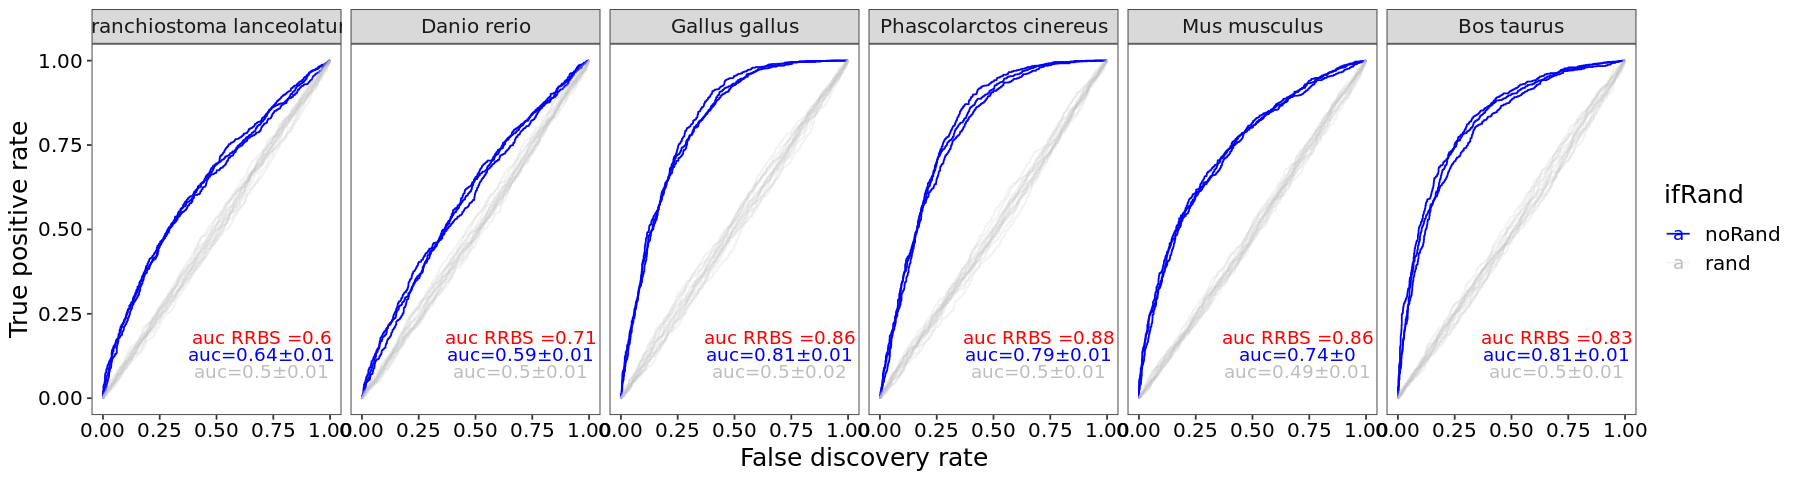

In [199]:
options(repr.plot.width = 15, repr.plot.height = 4)
ggplot(full_full_df, aes(x = fdr, y = tpr, color = ifRand)) + geom_line(aes(group=unique_run, alpha=ifRand)) + 
    geom_text(data=auc_res,aes(x=x,y=y,label=paste0("auc=",round(auc,2), "±", round(auc_sd, 2)))) +
     geom_text(data=auc_res[ifRand == "noRand"],aes(x=x,y=y+0.05,label=paste0("auc RRBS =",round(AUC,2))), color = "red") + 
    scale_color_manual(values=c("rand"="grey","noRand"="blue", "RRBS" = "red"))+
    scale_alpha_manual(values=c("rand"=0.2,"noRand"=1)) + 
    labs(x = "False discovery rate", y = "True positive rate") +
    theme(text = element_text(size = 15)) + facet_wrap(.~species, ncol = 6)
ggsave("../validation/WGBS_public/prediction/WGBS_auc.pdf", width = 20, height = 4)

In [200]:
write.table(unique(full_full_df[ifRand == "noRand", c("species", "seed_id", "k", "auc")]), "../validation/WGBS_public/prediction/WGBS_auc_and_k.csv", sep = ";", quote = F, row.names = F)